In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [95]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/carrot_weather.csv', encoding='utf-8')
df.head()

,Unnamed: 0,날짜,현재기온,이슬점온도,체감온도,습도,풍속,해면기압,가격
0,0,2020-04-15,19.2,2.9,63.0,34,15.1,1014.2,NaN
1,1,2020-04-14,22.2,-4.8,66.0,16,9.7,1015.9,"4,300"
2,2,2020-04-13,11.8,-2.4,55.0,37,16.9,1011.7,"4,500"
3,3,2020-04-12,9.4,5.7,50.0,78,5.4,1011.9,NaN
4,4,2020-04-11,14.0,3.7,57.0,50,6.5,1019.5,NaN


In [96]:
del df['Unnamed: 0']
df.head()

,날짜,현재기온,이슬점온도,체감온도,습도,풍속,해면기압,가격
0,2020-04-15,19.2,2.9,63.0,34,15.1,1014.2,NaN
1,2020-04-14,22.2,-4.8,66.0,16,9.7,1015.9,"4,300"
2,2020-04-13,11.8,-2.4,55.0,37,16.9,1011.7,"4,500"
3,2020-04-12,9.4,5.7,50.0,78,5.4,1011.9,NaN
4,2020-04-11,14.0,3.7,57.0,50,6.5,1019.5,NaN


In [97]:
df.shape

(470, 8)

In [98]:
df.isnull().sum()

날짜         0
현재기온       0
이슬점온도      0
체감온도       0
습도         0
풍속         0
해면기압       0
가격       274
dtype: int64

In [99]:
df.dtypes

날짜       object
현재기온     object
이슬점온도    object
체감온도     object
습도       object
풍속       object
해면기압     object
가격       object
dtype: object

In [100]:
df.columns

Index(['날짜', '현재기온', '이슬점온도', '체감온도', '습도', '풍속', '해면기압', '가격'], dtype='object')

In [0]:
# 가격 컬럼의 결측값을 컬럼 평균으로 채워주기
# fill_mean_func = lambda x : x.fillna(x.mean())
# df.groupby('가격').apply(fill_mean_func)

In [0]:
df['가격'] = df['가격'].str.replace(',','')

In [109]:
df.head()

,날짜,현재기온,이슬점온도,체감온도,습도,풍속,해면기압,가격
0,2020-04-15,19.2,2.9,63.0,34,15.1,1014.2,NaN
1,2020-04-14,22.2,-4.8,66.0,16,9.7,1015.9,4300
2,2020-04-13,11.8,-2.4,55.0,37,16.9,1011.7,4500
3,2020-04-12,9.4,5.7,50.0,78,5.4,1011.9,NaN
4,2020-04-11,14.0,3.7,57.0,50,6.5,1019.5,NaN


In [101]:
df.fillna(0)

,날짜,현재기온,이슬점온도,체감온도,습도,풍속,해면기압,가격
0,2020-04-15,19.2,2.9,63.0,34,15.1,1014.2,0
1,2020-04-14,22.2,-4.8,66.0,16,9.7,1015.9,"4,300"
2,2020-04-13,11.8,-2.4,55.0,37,16.9,1011.7,"4,500"
3,2020-04-12,9.4,5.7,50.0,78,5.4,1011.9,0
4,2020-04-11,14.0,3.7,57.0,50,6.5,1019.5,0
...,...,...,...,...,...,...,...,...
465,2019-01-06,8.5,-6.1,6.4,35,12.6,1025.0,0
466,2019-01-05,10.1,-11.2,8.2,21,14.0,1022.4,0
467,2019-01-04,2.9,-12.6,2.9,31,3.6,1029.8,0
468,2019-01-03,6.5,-14.9,3.0,20,19.8,1032.5,0


In [0]:
# 정해진 컬럼만 숫자로 바꿔줄 경우
# df['가격'] = pd.to_numeric(df.가격, errors='coerce').fillna(0)
# 데이터 프레임 전체의 타입을 숫자로 바꿔줄 경우
df['가격'] = pd.to_numeric(df['가격'])

In [113]:
df.dtypes

날짜        object
현재기온      object
이슬점온도     object
체감온도      object
습도        object
풍속        object
해면기압      object
가격       float64
dtype: object

In [0]:
# 문자 숫자로 바꿔주기
def change_float(x):
  try:
    tmp = float(x)
  except:
    if len(x) >1:
      tmp = float(x[1:]) * -1
    else:
      tmp = None
  return tmp

In [144]:
change_float("-20")

-20.0

In [0]:
# 음수 문자가 있는 컬럼에 함수 적용
df['현재기온'] = df['현재기온'].apply(change_float)
df['이슬점온도'] = df['이슬점온도'].apply(change_float)
df['체감온도'] = df['체감온도'].apply(change_float)
df['습도'] = df['습도'].apply(change_float)
df['풍속'] = df['풍속'].apply(change_float)
df['해면기압'] = df['해면기압'].apply(change_float)

In [149]:
df.dtypes

날짜        object
현재기온     float64
이슬점온도    float64
체감온도     float64
습도       float64
풍속       float64
해면기압     float64
가격       float64
dtype: object

In [0]:
# 앞의 값으로 대신 채워주기
df = df.fillna(method='ffill')

In [0]:
# 뒤의 값으로 대신 채워주기
df = df.fillna(method='bfill')

In [154]:
# 결과 확인
df.head()

,날짜,현재기온,이슬점온도,체감온도,습도,풍속,해면기압,가격
0,2020-04-15,19.2,2.9,63.0,34.0,15.1,1014.2,4300.0
1,2020-04-14,22.2,-4.8,66.0,16.0,9.7,1015.9,4300.0
2,2020-04-13,11.8,-2.4,55.0,37.0,16.9,1011.7,4500.0
3,2020-04-12,9.4,5.7,50.0,78.0,5.4,1011.9,4500.0
4,2020-04-11,14.0,3.7,57.0,50.0,6.5,1019.5,4500.0


In [156]:
# null값 최종 확인
df.isnull().sum()

날짜       0
현재기온     0
이슬점온도    0
체감온도     0
습도       0
풍속       0
해면기압     0
가격       0
dtype: int64

In [157]:
df.columns

Index(['날짜', '현재기온', '이슬점온도', '체감온도', '습도', '풍속', '해면기압', '가격'], dtype='object')

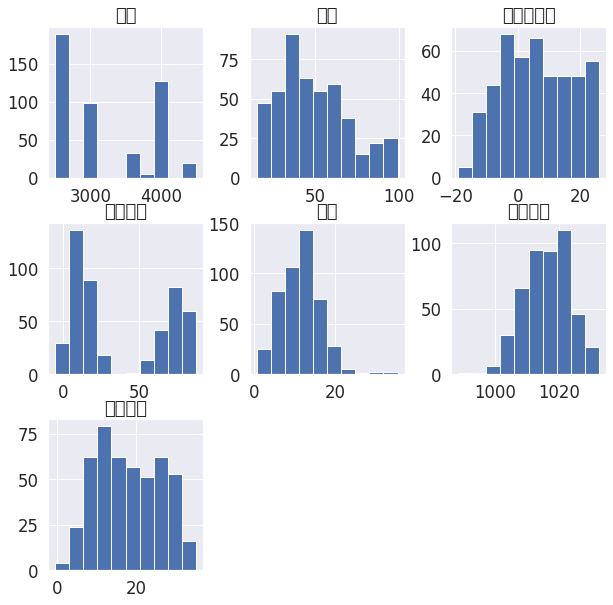

In [162]:
# 컬럼별 데이터 분포 보기
numerical_columns = ['현재기온', '이슬점온도', '체감온도', '습도', '풍속', '해면기압', '가격']

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df[numerical_columns].hist(ax=ax)
plt.show()

In [0]:
# 컬럼별 상관관계 보기
cols = ['현재기온', '이슬점온도', '체감온도', '습도', '풍속', '해면기압', '가격']

corr = df[cols].corr(method = 'pearson')

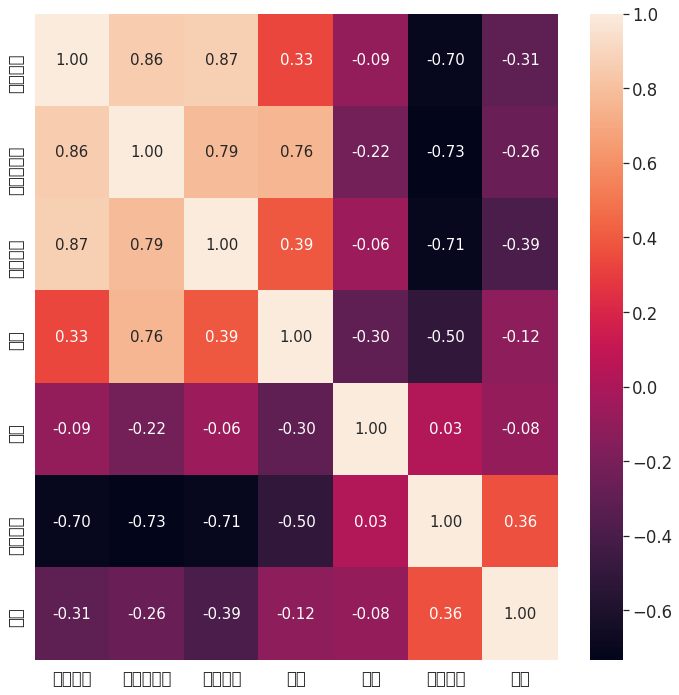

In [161]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 annot=True,
                 fmt = '.2f',
                 annot_kws = {'size':15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.tight_layout()
plt.show()

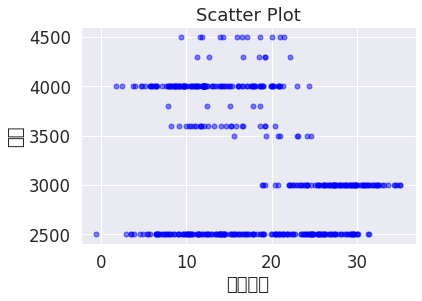

In [167]:
# cols = ['현재기온', '이슬점온도', '체감온도', '습도', '풍속', '해면기압', '가격']
# 스캐터로 확인
plt.plot('현재기온','가격',
         data=df,
         linestyle='none',
         marker='o',
         markersize=5,
         color='blue',
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('현재기온')
plt.ylabel('가격')
plt.show()

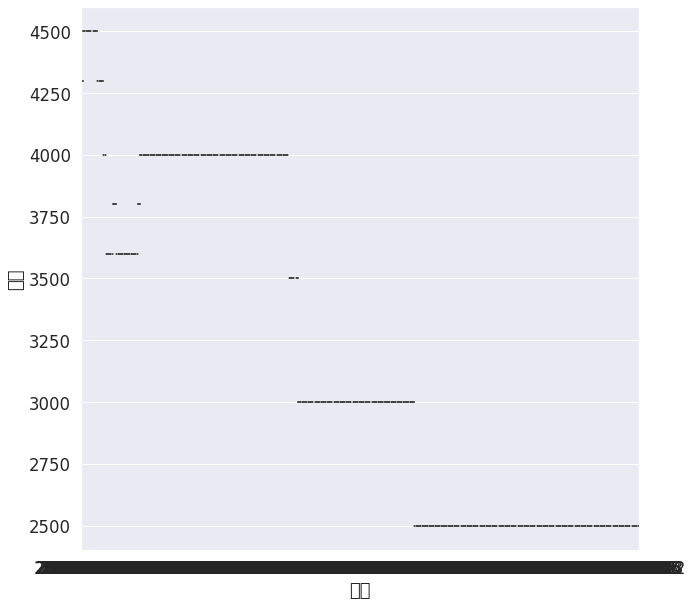

In [175]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.boxplot(x='날짜', y='가격', data=df, ax=ax)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['현재기온', '이슬점온도', '체감온도', '습도', '풍속', '해면기압']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df[scaler_columns]
y = df['가격']
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=33)

In [178]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

print(lr.coef_)

[ 2.31950272e-15 -2.16493490e-15 -2.49800181e-16  1.09634524e-15
 -1.80411242e-16  6.93889390e-17  1.00000000e+00]


In [0]:
plt.rcParams['figure.figsize'] = [12,16]
coefs = lr.coef_.tolist()
coefs_series = pd.Series(coefs)

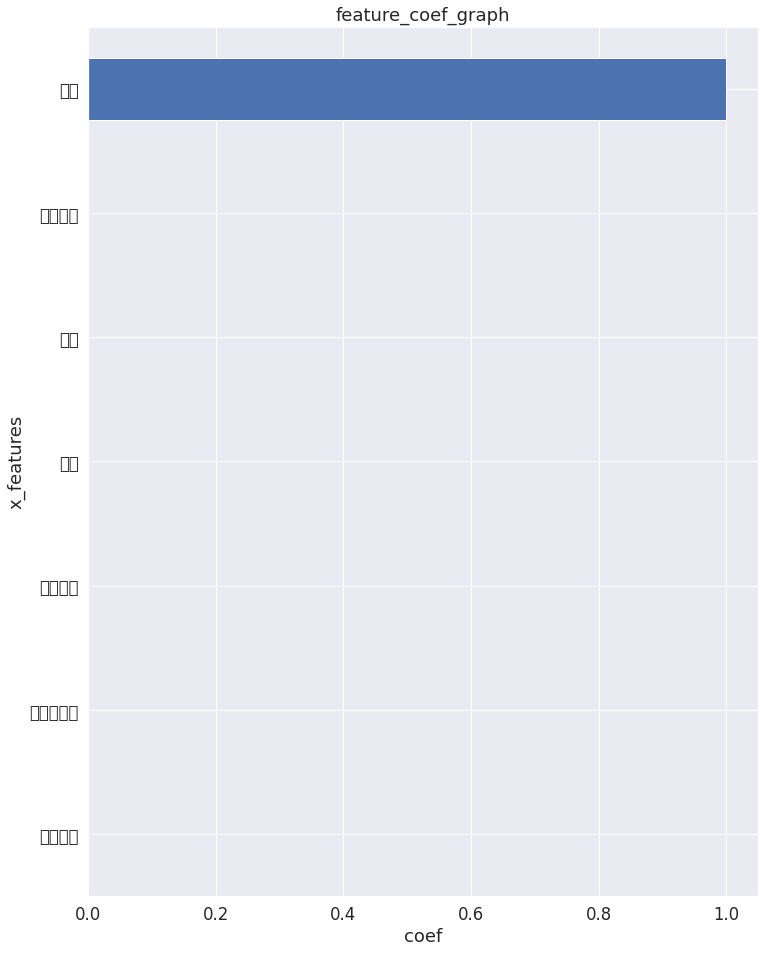

In [180]:
x_labels = scaler_columns
ax = coefs_series.plot.barh()
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

In [181]:
# 확인
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

1.0
1.0


In [182]:
# 평균 제곱근 오차
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

7.215143530735586e-16


In [183]:
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

7.136969912604919e-16


In [0]:
import statsmodels.api as sm

In [185]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     가격   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.872e+31
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        06:26:43   Log-Likelihood:                 12341.
No. Observations:                 376   AIC:                        -2.467e+04
Df Residuals:                     368   BIC:                        -2.463e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.067e-16   7.05e-17      1.513      0.131    -3.2e-17    2.45e-16
현재기온        -2.22e-16   4.77e-16     -0.466      0.642   -1.16e-15    7.16e-16
이슬점온도      -7.216e-16   6.27e-16     -1.151      0.251   -1.95e-15    5.11e-16
체감온도       -4.163e-17   1.55e-16     -0.269      0.788   -3.46e-16    2.62e-16
습도          2.776e-17   3.55e-16      0.078      0.938    -6.7e-16    7.25e-16
풍속                  0   7.58e-17          0      1.000   -1.49e-16    1.49e-16
해면기압        4.996e-16   1.13e-16      4.432      0.000    2.78e-16    7.21e-16
가격             1.0000   7.88e-17   1.27e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       53.744   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.151
Skew:                           0.157   Prob(JB):                     0.000513
Kurtosis:                       2.068   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF Factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.0,const
1,45.4,현재기온
2,79.5,이슬점온도
3,4.8,체감온도
4,26.7,습도
5,1.2,풍속
6,2.5,해면기압
7,1.2,가격
